## RNN (Recurrent Neural Network 순환신경망)

- 입력과 출력을 시퀀스 단위로 처리 (시퀀스: 문장 같은 단어가 나열된 것)

- 시퀀스들을 처리하기 위해 고안된 모델을 시퀀스 모델이라 하며, 그중에서 RNN은 딥러닝의 가장 기본적인 시퀀스 모델임 

- 가장 중요한 정보가 앞 쪽의 시점에 위치할 경우 RNN의 경우 앞쪽의 중요한 정보가 뒤로 오면서 정보량의 손실이 일어나게 됨 (RNN의 장기 의존성 문제)

- 이러한 문제를 보완한 RNN 모델로 장단기 메모리 LSTM과 게이트 순환 유닛 GRU가 있음.

#### LSTM

- 네트워크는 1997년 혹스라이터와 슈미트후버에 의해 발명됨. 여러 응용분야에서 독보적인 정확성을 보여주었음. 2007년을 전후로, LSTM은 음성 인식 분야에서 기존의 전통적인 모델들을 능가하는 성능을 보임
- LSTM은 순환 신경망 모텔의 일종으로 시퀀스 또는 시계열 데이터의 패턴을 인식하는 분야에 사용
- 연속적인 데이터의 패턴을 이용해 결과를 예측함. 주가 예측이나 신호 분석 및 번역 분야에서 좋은 성능을 보임 

## 6.3.1 RNN
- 은닉층 노드의 출력값을 출력층과 그 다음 시점의 은닉층 노드의 입력으로 전달해 순환하는 특징

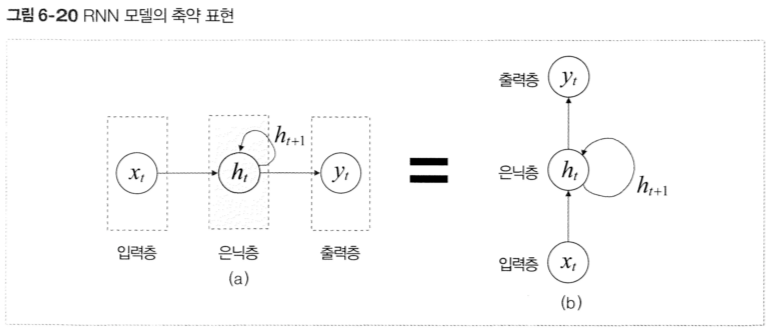

In [3]:
from IPython.display import Image
Image('Data/230627/1.png', width = 500)

$x$: 입력벡터
$y$: 출력벡터
$t$: 현재시점

은닉층 노드(a)는 이전시점(t-1)의 상태값을 저장하는 메모리 역할을 수행하므로 cell 또는 메모리셀이라고 부름

은닉층 메모리셀의 출력벡터는 출력층과 다음시점(t+1)의 메모리셀에 전달되는데, 이를 은닉상태라고함

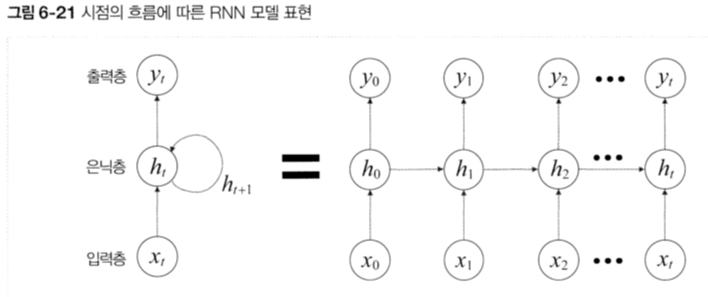

In [4]:
Image('Data/230627/2.png', width = 500)

현재 시점의 메모리셀은 이전 시점의 은닉 상태값에 영향을 받고 있으며 완전 연결 계층 구조를 갖고 있음

입력, 출력 길이 조정 가능

### 1) many-to-one 모델

ex) 09:00부터 09:59분까지 분 단위로 온도 데이터를 입력받아 현재까지의 온도흐름이 정상(1 )인지 비정상(0) 인지 판단. 메일 제목을 입력받아 해당 메일이 스팸인지 아닌지 판단하는 모델로 사용 가능

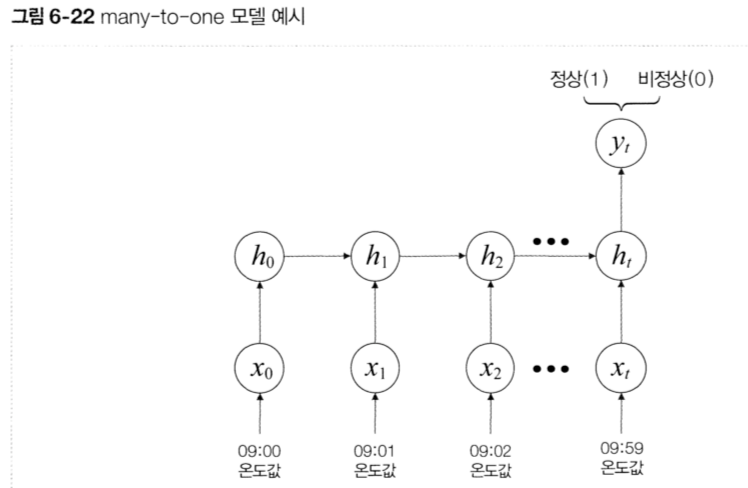

In [5]:
Image('Data/230627/3.png', width = 500)

### 2) one-to-many 모델
한 장의 이미지를 입력받아 이미지를 설명하는 텍스트를 출력하는 모델

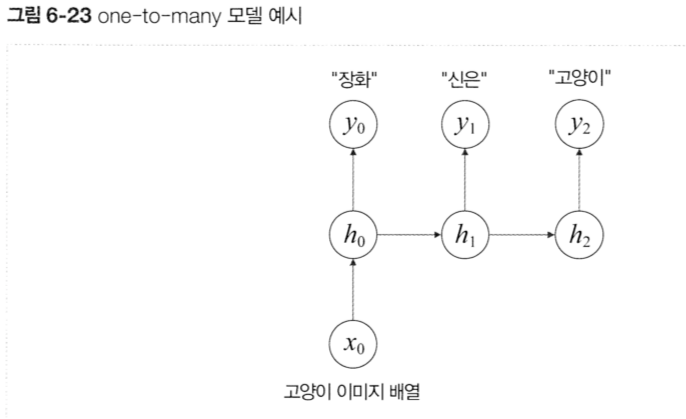

In [6]:
Image('Data/230627/4.png', width = 500)

###  3) many-to-many 모델
단어 시퀀스를 입력으로 받아 각 시퀀스가 의미하는 개제명을 출력하는 구조

ex) 한국어를 입력받아 영어로출력하는 번역기 모델로도 사용 가능

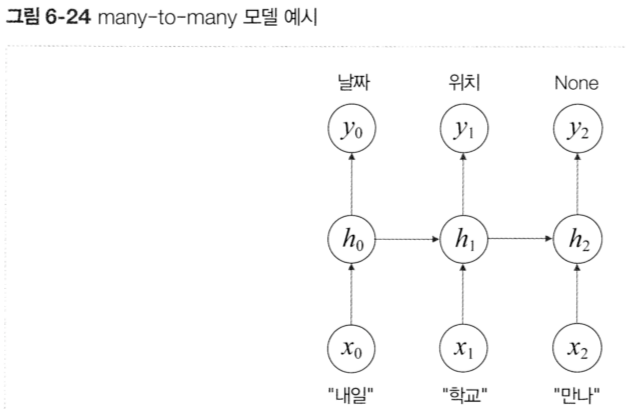

In [7]:
Image('Data/230627/5.png', width = 500)

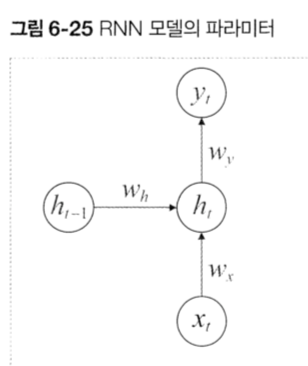

In [9]:
Image('Data/230627/6.png', width = 200)

- RNN은 모든 시점에서 동일한 가중치와 편향값을 사용

$ 은닉층:  h_t = tanh(w_xx_t + w_hh_{t-1} + b_h)$

$ 출력층:  y_t = w_yh_t + b_y $

$ X_t $ : 현재 시점의 입력벡터

$ h_t $ : 현재 시점의 은닉상태벡터

$ Y_t $ : 현재 시점의 출력벡터

$ W_x $ : $X_t$에 대한 가중치

$ W_h $ : $H_{t-1}$에 대한 가중치

$ W_y $ : $Y_t$에 대한 가중치

- 현재 시점의 은닉상태값 $h_t$는, 현재 입력값과 이전시점의 은닉 상태값, 편향값 $b$를 갖고 있으며, 활성화함수로 하이퍼블릭 탄젠트(tanh) 사용
- 이전시점의 은닉 상탯값이 현재 시점의 은닉 상태에 계속해서 영향을 주기 때문에 시퀀스 데이터의 특징을 잘 파악할 수 있음

### [예제5] sin곡선 예측 RNN

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, LSTM, SimpleRNN
 

# sin함수 학습 데이터
x = [i for i in np.arange(start = -10, stop = 10, step = 0.1)]

# sin함수 변환 결과를 리스트에 담음. RNN모델 학습에 필요한 학습데이터셋
train_y = [np.sin(i) for i in x]

In [31]:
len(x), print(train_y)

[0.5440211108893698, 0.45753589377532133, 0.3664791292519284, 0.2717606264109442, 0.1743267812229814, 0.07515112046181108, -0.02477542545335599, -0.12445442350705994, -0.2228899141002442, -0.31909836234934874, -0.4121184852417533, -0.5010208564578816, -0.5849171928917588, -0.6629692300821793, -0.7343970978741098, -0.798487112623487, -0.8545989080882778, -0.9021718337562911, -0.9407305566797707, -0.9698898108450846, -0.9893582466233808, -0.9989413418397717, -0.9985433453746054, -0.9881682338770016, -0.9679196720314885, -0.9379999767747419, -0.8987080958116308, -0.8504366206285696, -0.7936678638491591, -0.7289690401258833, -0.6569865987187972, -0.5784397643882089, -0.4941133511386182, -0.4048499206166089, -0.3115413635133897, -0.21511998808782767, -0.11654920485050599, -0.016813900484363032, 0.08308940281748313, 0.18216250427208192, 0.2794154981989122, 0.37387666483022286, 0.464602179413744, 0.550685542597625, 0.6312666378723092, 0.7055403255703806, 0.7727644875559769, 0.8322674422238919

(200, None)

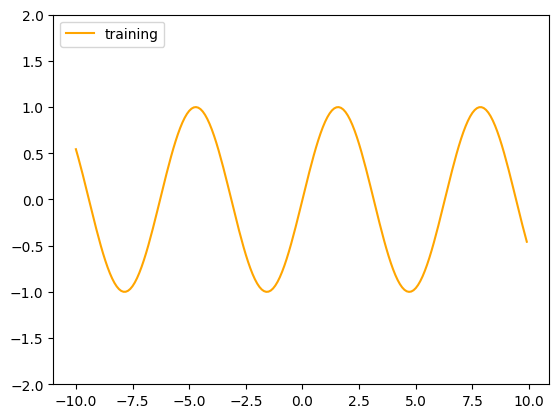

In [32]:
# 그래프 그리기
plt.plot(x, train_y, label = 'training', color = 'orange')
plt.legend(loc = 'upper left')
plt.ylim(-2,2)
plt.show()

In [33]:
# 하이퍼파라미터
n_timesteps = 15  # 입력 시퀀스 길이 15, 동글배기(노드)가 15개란 뜻
n_features = 1    # 입력 백터의 차원 1 

# 시퀀스나누기
# time step만큼 시퀀스 데이터 분리
def split_sequence(sequence, step):
    x, y = list(), list()
    for i in range(len(sequence)):
        end_idx = i + step
        if end_idx > len(sequence) - 1:
            break
        seq_x, seq_y = sequence[i:end_idx], sequence[end_idx]
        x.append(seq_x)
        y.append(seq_y)
    return np.array(x), np.array(y)      

train_x, train_y = split_sequence(train_y, step = n_timesteps)
print("shape x:{} / y:{}".format(train_x.shape, train_y.shape))

shape x:(185, 15) / y:(185,)


In [34]:
# RNN 입력 벡터 크기 맞추기 위해 벡터 차원크기 변경
# reshape from [samples, timesteps] into [samples, timesteps, features]

'''
케라스에서 RNN 계층을 사용하려면 3차원 텐서 tensor 형태여야 함
따라서 현재 2차원 (samples, time_step) 인 train_x를 RNN 모델의 입력 데이터 형상에 맞게 
차원 (batch size, time step, input length) 형태로 변환
'''

# 3D 텐서 형태로 변경
train_x = train_x.reshape(train_x.shape[0], train_x.shape[1], n_features)
print('train_x.shape = {}'.format(train_x.shape))
print('train_y.shape = {}'.format(train_y.shape))

train_x.shape = (185, 15, 1)
train_y.shape = (185,)


In [35]:
# RNN 모델 정의
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

model = Sequential()
model.add(SimpleRNN(units = 10,                # units: RNN 계층에 존재하는 전체 뉴런 수
                    return_sequences =False,   # RNN 계산과정에서 은닉 상태값을 출력할지 결정
                    # False: 마지막 시점의 메모리셀에서만 결과 출력
                    # True: 모든 RNN 계산 과정에서 결과 출력, one-to-many와 many-to-many 구조를 위해 사용함
                    input_shape = (n_timesteps, n_features)))   # n_timesteps 입력시퀀스 길이, n_features 출력벡터크기
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')

Epoch 1/1000
6/6 [==============================] - 1s 3ms/step - loss: 0.4717
Epoch 2/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.3880
Epoch 3/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.3145
Epoch 4/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.2492
Epoch 5/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.1933
Epoch 6/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.1477
Epoch 7/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.1133
Epoch 8/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.0892
Epoch 9/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.0741
Epoch 10/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.0649
Epoch 11/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.0590
Epoch 12/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.0550
Epoch 13/1000
6/6 [==============================

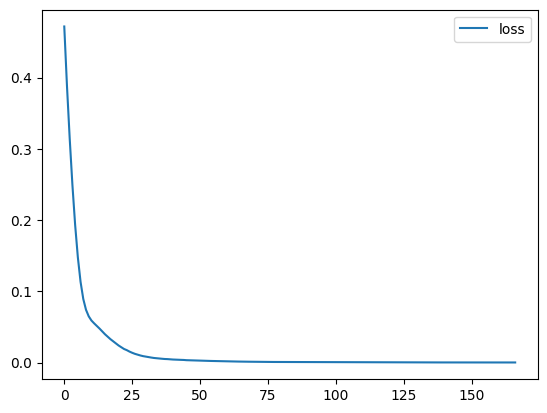

In [36]:
# 모델 학습
np.random.seed(0)
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor= 'loss', patience = 5, mode = 'auto')
history = model.fit(train_x, train_y, epochs = 1000, callbacks = [early_stopping])

# loss 그래프 생성
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label = 'loss')
plt.legend(loc = 'upper right')
plt.show()

In [37]:
# 테스트 데이터셋 생성
test_x = np.arange(10,20,0.1)
calc_y = np.sin(test_x)   # 테스트 정답 데이터

# RNN 모델 예측 및 로그 저장
test_y = calc_y[:n_timesteps]
len(test_x), calc_y, test_y

(100,
 array([-0.54402111, -0.62507065, -0.69987469, -0.76768581, -0.82782647,
        -0.87969576, -0.92277542, -0.95663502, -0.98093623, -0.99543625,
        -0.99999021, -0.99455259, -0.97917773, -0.95401925, -0.91932853,
        -0.87545217, -0.82282859, -0.76198358, -0.69352508, -0.61813711,
        -0.53657292, -0.44964746, -0.35822928, -0.26323179, -0.16560418,
        -0.0663219 ,  0.03362305,  0.13323204,  0.23150983,  0.32747444,
         0.42016704,  0.50866146,  0.59207351,  0.66956976,  0.74037589,
         0.80378443,  0.85916181,  0.90595474,  0.94369567,  0.9720075 ,
         0.99060736,  0.99930939,  0.99802665,  0.98677196,  0.96565778,
         0.93489506,  0.89479117,  0.84574683,  0.78825207,  0.72288135,
         0.65028784,  0.57119687,  0.48639869,  0.39674057,  0.30311836,
         0.20646748,  0.10775365,  0.00796318, -0.09190685, -0.19085858,
        -0.28790332, -0.38207142, -0.47242199, -0.55805227, -0.63810668,
        -0.71178534, -0.77835208, -0.83714178

(15,) (1, 1) 0 15
(16,) (1, 1) 1 16
(17,) (1, 1) 2 17
(18,) (1, 1) 3 18
(19,) (1, 1) 4 19
(20,) (1, 1) 5 20
(21,) (1, 1) 6 21
(22,) (1, 1) 7 22
(23,) (1, 1) 8 23
(24,) (1, 1) 9 24
(25,) (1, 1) 10 25
(26,) (1, 1) 11 26
(27,) (1, 1) 12 27
(28,) (1, 1) 13 28
(29,) (1, 1) 14 29
(30,) (1, 1) 15 30
(31,) (1, 1) 16 31
(32,) (1, 1) 17 32
(33,) (1, 1) 18 33
(34,) (1, 1) 19 34
(35,) (1, 1) 20 35
(36,) (1, 1) 21 36
(37,) (1, 1) 22 37
(38,) (1, 1) 23 38
(39,) (1, 1) 24 39
(40,) (1, 1) 25 40
(41,) (1, 1) 26 41
(42,) (1, 1) 27 42
(43,) (1, 1) 28 43
(44,) (1, 1) 29 44
(45,) (1, 1) 30 45
(46,) (1, 1) 31 46
(47,) (1, 1) 32 47
(48,) (1, 1) 33 48
(49,) (1, 1) 34 49
(50,) (1, 1) 35 50
(51,) (1, 1) 36 51
(52,) (1, 1) 37 52
(53,) (1, 1) 38 53
(54,) (1, 1) 39 54
(55,) (1, 1) 40 55
(56,) (1, 1) 41 56
(57,) (1, 1) 42 57
(58,) (1, 1) 43 58
(59,) (1, 1) 44 59
(60,) (1, 1) 45 60
(61,) (1, 1) 46 61
(62,) (1, 1) 47 62
(63,) (1, 1) 48 63
(64,) (1, 1) 49 64
(65,) (1, 1) 50 65
(66,) (1, 1) 51 66
(67,) (1, 1) 52 67
(68

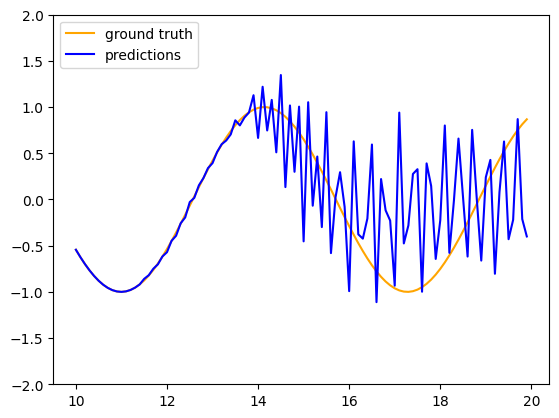

In [38]:
for i in range(len(test_x) - n_timesteps):
    net_input = test_y[i:i+n_timesteps]
    net_input = net_input.reshape((1,n_timesteps, n_features))
    train_y = model.predict(net_input, verbose = 0)
    print(test_y.shape, train_y.shape, i, i+n_timesteps)
    test_y = np.append(test_y, train_y)

# 예측결과 그래프 그리기
plt.plot(test_x, calc_y, label = 'ground truth', color = 'orange')
plt.plot(test_x, test_y, label = 'predictions', color = 'blue')
plt.legend(loc = 'upper left')
plt.ylim(-2,2)
plt.show()

In [39]:
len(test_y), test_y

(100,
 array([-0.54402111, -0.62507065, -0.69987469, -0.76768581, -0.82782647,
        -0.87969576, -0.92277542, -0.95663502, -0.98093623, -0.99543625,
        -0.99999021, -0.99455259, -0.97917773, -0.95401925, -0.91932853,
        -0.85871071, -0.81932688, -0.7496655 , -0.70210147, -0.61669046,
        -0.57051164, -0.44784757, -0.3924062 , -0.25808766, -0.19428569,
        -0.02832628,  0.01799184,  0.15279001,  0.23138565,  0.33945143,
         0.39348167,  0.51391298,  0.59770226,  0.63801038,  0.70472056,
         0.85678226,  0.80198097,  0.88613224,  0.94076186,  1.12857807,
         0.66618133,  1.21983409,  0.74707258,  1.07761371,  0.51035404,
         1.34681726,  0.13412401,  1.01753473,  0.29958752,  1.00477052,
        -0.45318016,  1.05257988, -0.06737129,  0.46473899, -0.29864946,
         0.94470847, -0.58058083,  0.02254665,  0.29502687, -0.07944671,
        -0.99196589,  0.62902188, -0.37716809, -0.42373398, -0.20599777,
         0.59474844, -1.11107266,  0.22109237

황색 실선의 sin 파형이 테스트 데이터셋의 정답 데이터이며

청색 실선의 sin 파형이 우리가 학습한 RNN 모델의 예측 결과임